<a href="https://colab.research.google.com/github/Kunj0201/Classification-of-Fashion-Apparels-Using-CNN-Algorithm-on-MNIST-Dataset/blob/main/Fashion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1: IMPORTING DATA 

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import dataset.

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Import tensorflow's MNIST data handle
fashion_mnist = keras.datasets.fashion_mnist

# Load fashion dataset into the set for training & testing 
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# The original dataset comes with the shape [image_index, 28_, 28_]
# We flatten the data into the shape [image_index, 784 (28_ + 28_)]

#training_data = np.array([img_train.flatten() for img_train in train_data],)
training_data = np.array([data.flatten() for data in train_data], dtype='float32')
# Convert List to array and then Tranpose in order to have an Array of [img_index, 1]
training_label = np.array([train_label]).T

In [ ]:
testing_data = np.array([data.flatten() for data in test_data],dtype='float32')
# Convert List to array and then Tranpose in order to have an Array of [img_index, 1]
testing_label = np.array([test_label]).T

# STEP 2 : VISUALIZING DATA 

In [ ]:
#shape of trainning data
training_data.shape

(60000, 784)

In [ ]:
#shape of trainning label
training_label.shape

(60000, 1)

In [ ]:
#shape of testing data  
testing_data.shape

(10000, 784)

In [ ]:
#shape of testing label
testing_label.shape

(10000, 1)

Label for this image is: 3


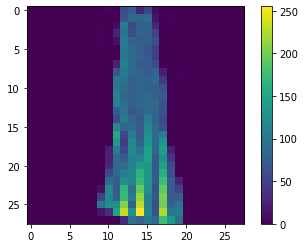

In [ ]:
import random

# generate a randox img index for training_data
i = random.randint(1,60000)

#showing training data
print('Label for this image is: ' + str(training_label[i,0]))
plt.figure()
plt.imshow(training_data[i, 0:].reshape(28,28), cmap='viridis')
plt.colorbar()
plt.grid(False)
plt.show()


# This are the label classes:
# 0 => 'T-shirt/top'
# 1 => 'Trouser'
# 2 => 'Pullover'
# 3 => 'Dress'
# 4 => 'Coat'
# 5 => 'Sandal'
# 6 => 'Shirt'
# 7 => 'Sneaker'
# 8 =>  'Bag'
# 9 => 'Ankle boot'



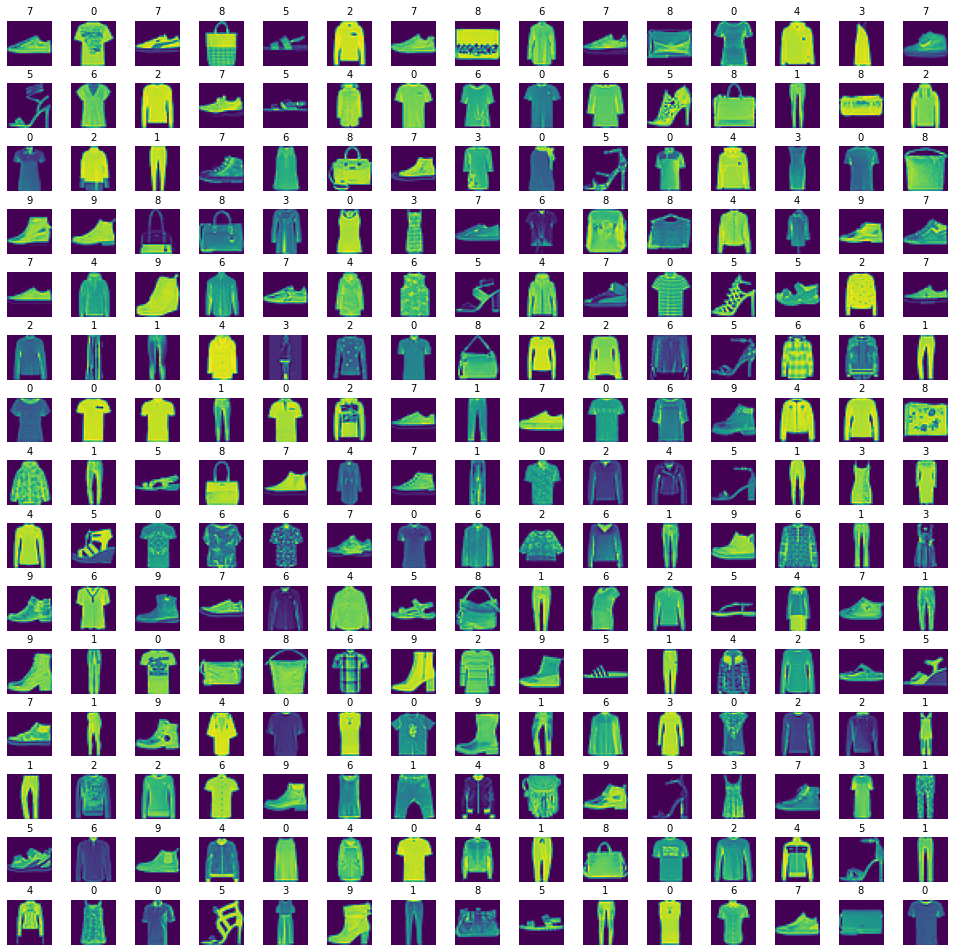

In [ ]:
# lets visualize a set of images in order to have a better image of the problem
# define the demensions of the plot grid
W_grid = 15
L_grid = 15

# fig, size = plt.subplots(L_grid,w_grid)

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flatten the 15 x 15 matrix into 255 array

n_training = len(training_data)

for i in np.arange(0, W_grid * L_grid):
  
  # select random number
  index = random.randint(0, n_training)
  axes[i].imshow(training_data[index, 0:].reshape(28,28), cmap='viridis')
  axes[i].set_title(training_label[index,0], fontsize = 10)
  axes[i].axis('off')
  
plt.subplots_adjust(hspace=0.4)



#STEP 3: TRAINING MODEL 

In [ ]:
# normalize the training & testing data
X_train = training_data[:,:]/255
y_train = training_label[:, 0]

X_test = testing_data[:,:]/255
y_test = testing_label[:, 0]

In [ ]:
# import train_test split selection
from sklearn.model_selection import train_test_split

In [ ]:
# create train and validation dataset
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [ ]:
# reshape dataset
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [ ]:
# show shape
X_train.shape

(48000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_validate.shape

(12000, 28, 28, 1)

In [ ]:
# import keras layers, optimizer & callbacks
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
# start forming the model. In our case we use an CNN & Dense model in order to solve the problem
cnn_model = Sequential()

In [ ]:
# Fisrt Iteration --> Convulutional with 64 features / 3,3 kernel and Relu activation function
cnn_model.add(Conv2D(64, 3, 3, input_shape = (28,28,1), activation="relu"))

In [ ]:
# MaxPooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# flat images to inputs
cnn_model.add(Flatten())

In [ ]:
# Second Iteration --> Dense of 64 outputs
cnn_model.add(Dense(units = 64, activation = "relu"))

In [ ]:
# The Third Iteration use a Dropout layer to improve the model. Trying to avoid overfitting over the Dense layer
# Dropout 0.4 ratio
cnn_model.add(Dropout(rate=0.4))

In [ ]:
# Dense of 10 outputs (fashion classes)
cnn_model.add(Dense(10, activation = "sigmoid"))

In [ ]:
# compile model
cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer=Adam(lr=0.001), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# define # of epochs
epochs = 70

In [ ]:
# train the model
cnn_model.fit(X_train, 
              y_train, 
              batch_size = 400 ,
              epochs = epochs,
              verbose=1, 
              validation_data= (X_validate, y_validate))

Epoch 1/70
120/120 [==============================] - 1s 10ms/step - loss: 0.3702 - accuracy: 0.8650 - val_loss: 0.3327 - val_accuracy: 0.8758
Epoch 2/70
120/120 [==============================] - 1s 9ms/step - loss: 0.3692 - accuracy: 0.8641 - val_loss: 0.3318 - val_accuracy: 0.8762
Epoch 3/70
120/120 [==============================] - 1s 9ms/step - loss: 0.3657 - accuracy: 0.8649 - val_loss: 0.3311 - val_accuracy: 0.8751
Epoch 4/70
120/120 [==============================] - 1s 9ms/step - loss: 0.3617 - accuracy: 0.8658 - val_loss: 0.3319 - val_accuracy: 0.8769
Epoch 5/70
120/120 [==============================] - 1s 9ms/step - loss: 0.3616 - accuracy: 0.8681 - val_loss: 0.3300 - val_accuracy: 0.8768
Epoch 6/70
120/120 [==============================] - 1s 9ms/step - loss: 0.3587 - accuracy: 0.8696 - val_loss: 0.3268 - val_accuracy: 0.8790
Epoch 7/70
120/120 [==============================] - 1s 9ms/step - loss: 0.3558 - accuracy: 0.8706 - val_loss: 0.3300 - val_accuracy: 0.8759
Epoch

# STEP 4: EVALUATING MODEL

In [ ]:
# Evaluate the model
evaluation = cnn_model.evaluate(X_test,y_test,batch_size=1)
# print the evaluation Accuaracy
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 33s 3ms/step - loss: 0.3602 - accuracy: 0.8769
Test Accuracy : 0.877


In [ ]:
# show the predicted classes (y_label_test) using as input the X_test set 
predict_x = cnn_model.predict(X_test)
predicted_classes = np.argmax(predict_x, axis=1)
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

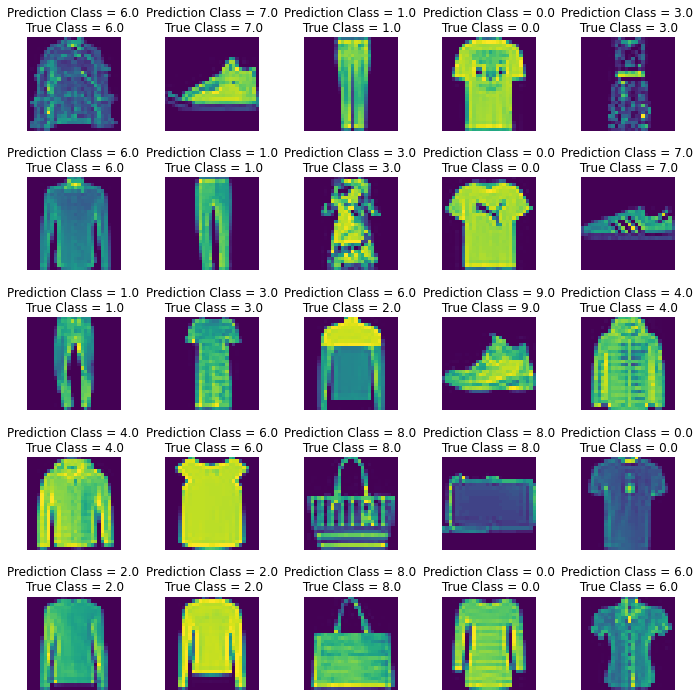

In [ ]:
# visualize the results
W = 5
L = 5

# fig, size = plt.subplots(L_grid,w_grid)

fig, axes = plt.subplots(L, W, figsize = (12,12))

axes = axes.ravel() # flatten the 12 x 12 matrix into 255 array

n_testing = len(X_test)

for i in np.arange(0, W * L):
  
  # select random number
  index = random.randint(0, n_testing)
  axes[i].imshow(X_test[index].reshape(28,28), cmap='viridis')
  axes[i].set_title("Prediction Class = {:.1f}\n True Class = {:.1f}".format(predicted_classes[index],y_test[index]))
  axes[i].axis('off')
  
plt.subplots_adjust(hspace=0.5)



Text(0.5, 1.0, 'Confusion Matrix')

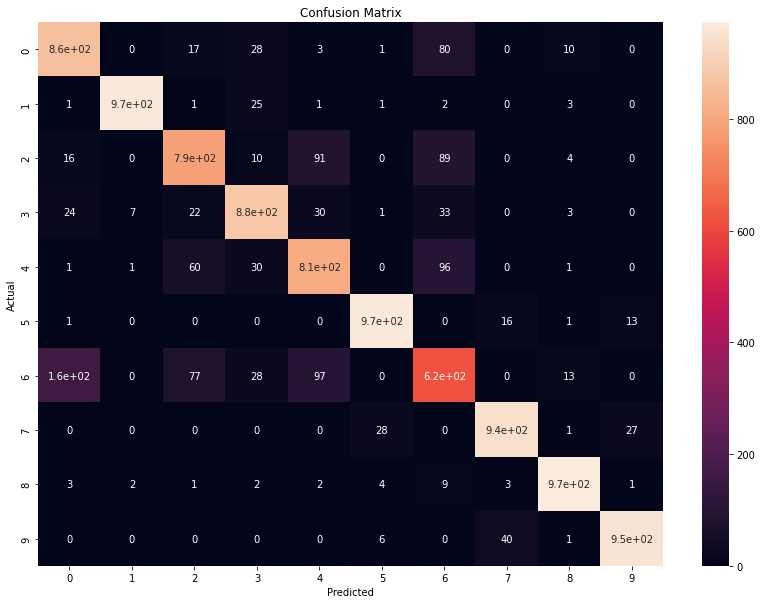

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot= True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
# sum the diagonal element to get the the total true correct values